In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tensorflow.keras.datasets import mnist
import tensorflow

In [31]:
(trainX, trainy,), (testX, testy) = mnist.load_data()
print("trainX: ",trainX.shape)
print("trainy: ",trainy.shape)
print("testX: ",testX.shape)
print("testy: ",testy.shape)

trainX:  (60000, 28, 28)
trainy:  (60000,)
testX:  (10000, 28, 28)
testy:  (10000,)


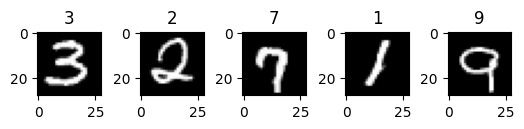

In [32]:
for j in range(5):
    i = np.random.randint(0,10000)
    plt.subplot(550+1+j)
    plt.imshow(trainX[i], cmap='gray')
    plt.title(trainy[i])
plt.show()

## Normalizasyon

In [33]:
trainX = trainX /255
testX = testX /255
train_data = np.reshape(trainX, (60000,28*28))
test_data = np.reshape(testX, (10000,28*28))
print(train_data.shape , test_data.shape)

(60000, 784) (10000, 784)


# AE model

* kodlama encode

In [34]:
input_data = tensorflow.keras.layers.Input(shape=(784))
encoder = tensorflow.keras.layers.Dense(100)(input_data)
encoder = tensorflow.keras.layers.Activation('relu')(encoder)
encoder = tensorflow.keras.layers.Dense(50)(encoder)
encoder = tensorflow.keras.layers.Activation('relu')(encoder)
encoder = tensorflow.keras.layers.Dense(25)(encoder)
encoder = tensorflow.keras.layers.Activation('relu')(encoder)
encoded = tensorflow.keras.layers.Dense(2)(encoder)


* kod çözme decode

In [35]:
decoder = tensorflow.keras.layers.Dense(25)(encoded)
decoder = tensorflow.keras.layers.Activation('relu')(decoder)
decoder = tensorflow.keras.layers.Dense(50)(decoder)
decoder = tensorflow.keras.layers.Activation('relu')(decoder)
decoder = tensorflow.keras.layers.Dense(100)(decoder)
decoder = tensorflow.keras.layers.Activation('relu')(decoder)
decoded = tensorflow.keras.layers.Dense(784)(decoder)


In [36]:
autoencoder = tensorflow.keras.Model(input_data, decoded)
autoencoder.compile(optimizer='adam', loss='mse',metrics= 'accuracy')   # mse karesel hata 
autoencoder.summary()


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_16 (Dense)            (None, 100)               78500     
                                                                 
 activation_12 (Activation)  (None, 100)               0         
                                                                 
 dense_17 (Dense)            (None, 50)                5050      
                                                                 
 activation_13 (Activation)  (None, 50)                0         
                                                                 
 dense_18 (Dense)            (None, 25)                1275      
                                                                 
 activation_14 (Activation)  (None, 25)                0   

                                                                 
 dense_23 (Dense)            (None, 784)               79184     
                                                                 
Total params: 170536 (666.16 KB)
Trainable params: 170536 (666.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
autoencoder.fit(train_data, train_data, epochs=10, batch_size=64, validation_data=(test_data, test_data))


Epoch 1/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0406 - accuracy: 0.0120 - val_loss: 0.0405 - val_accuracy: 0.0102
Epoch 2/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0401 - accuracy: 0.0109 - val_loss: 0.0397 - val_accuracy: 0.0096
Epoch 3/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0396 - accuracy: 0.0114 - val_loss: 0.0393 - val_accuracy: 0.0107
Epoch 4/10
938/938 [==============================] - 6s 7ms/step - loss: 0.0394 - accuracy: 0.0106 - val_loss: 0.0393 - val_accuracy: 0.0104
Epoch 5/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0391 - accuracy: 0.0113 - val_loss: 0.0389 - val_accuracy: 0.0090
Epoch 6/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0388 - accuracy: 0.0113 - val_loss: 0.0386 - val_accuracy: 0.0112
Epoch 7/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0387 - accuracy: 0.0105 - val_loss: 0.0389 - val_accuracy: 0.0097
Epoch 

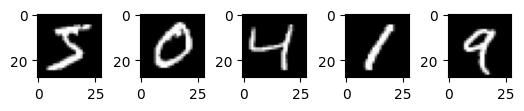

1/1 [==============================] - 0s 21ms/step


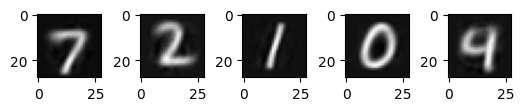

In [43]:
for i in range(5):
    plt.subplot(550+1+i)
    plt.imshow(trainX[i], cmap='gray')
plt.show()

for i in range(5):
    plt.subplot(550+1+i)
    output = autoencoder.predict(np.array([test_data[i]]))
    op_image = np.reshape(output[0]*255,(28,28))
    plt.imshow(op_image, cmap='gray')
plt.show()